# 处理数据

In [9]:
# pip install plotly

In [10]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import os

In [11]:
# 设置 Matplotlib 中文支持
plt.rcParams["font.family"] = "Arial"

In [12]:
ticker = "NVDA"
period = "1y"

df = yf.download(ticker, period=period, group_by="ticker")
df = df[ticker]
df = df.reset_index()

[*********************100%***********************]  1 of 1 completed


In [13]:
os.makedirs("dataframe", exist_ok=True)
df.to_csv("dataframe/aapl.csv", index=False)

print("数据维度：", df.shape)
print("前几行：")
display(df.head())

数据维度： (250, 6)
前几行：


Price,Date,Open,High,Low,Close,Volume
0,2024-06-04,115.677994,116.561699,114.007538,116.398750,403324000
1,2024-06-05,118.332117,122.408772,117.429413,122.399780,528402000
2,2024-06-06,124.007245,125.545741,118.281130,120.958252,664696000
3,2024-06-07,119.730653,121.652026,117.983234,120.848289,412386000
4,2024-06-10,120.330461,123.059560,116.971564,121.749992,314162700


In [14]:
df.drop(index=1, inplace=True)
df.reset_index(drop=True, inplace=True)

In [15]:
# 4. 保存清洗后的数据
os.makedirs("dataframe", exist_ok=True)
df.to_csv("dataframe/aapl_clean.csv", index=False)

# 🟩 5. 展示基本结构和描述统计
print("数据维度：", df.shape)
print("前几行：")
display(df.head())

数据维度： (249, 6)
前几行：


Price,Date,Open,High,Low,Close,Volume
0,2024-06-04,115.677994,116.561699,114.007538,116.398750,403324000
1,2024-06-06,124.007245,125.545741,118.281130,120.958252,664696000
2,2024-06-07,119.730653,121.652026,117.983234,120.848289,412386000
3,2024-06-10,120.330461,123.059560,116.971564,121.749992,314162700
4,2024-06-11,121.739992,122.839727,118.710740,120.880211,222551200


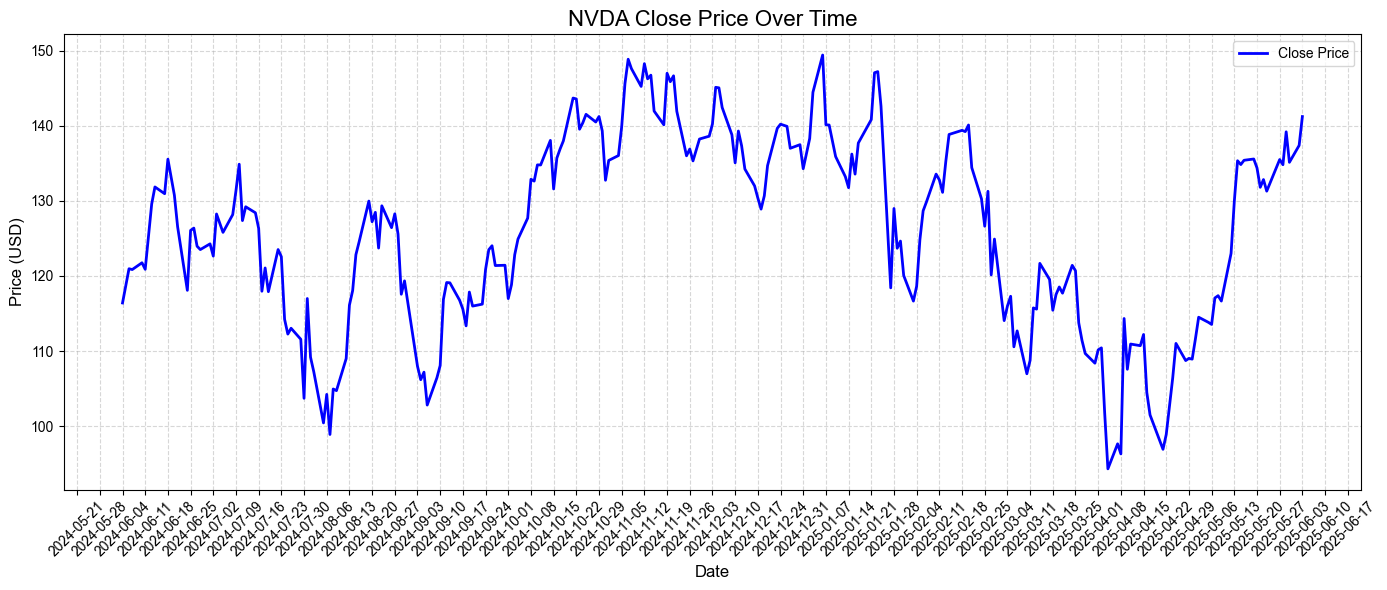

In [16]:
# 6. 绘制更清晰的收盘价趋势图（matplotlib）
import matplotlib.dates as mdates

plt.figure(figsize=(14, 6))
plt.plot(df["Date"], df["Close"], color='blue', linewidth=2, label="Close Price")

# 优化：设置标题和坐标轴
plt.title(f"{ticker} Close Price Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)

# 优化：格式化 x 轴日期显示（每周标一个）
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# 网格、图例、美化
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
